# Current goal of this notebook: find likely-looking galaxies from a given mask to show up in that quasar's absorbers.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import astropy.io.fits as fits

import os
from glob import glob

In [2]:
plt.style.use('default')
plt.style.use('ggplot')

#### Pandas has weird indexing. This is a comment that is worth keeping around.

In [3]:
def improved_GuessAndCheck(files, stars_filter=False, star_forming=False):
    
    """
    Reads in a 'done' json file. First argument is your json file name, second is whether or not
    you want stars in the returned dataframe, third is whether you want star formation. 
    Default for the latter two is to not filter stars/formation. Star-forming will also automatically 
    filter out stars as well. 
    
    Returns a pandas dataframe consisting of entries in json file with vetrr ZQ 
    of 3 or 4 (i.e. confident of redshift).
    """
    
    try:
        frame = (pd.read_json(files).T)
        legit = frame.query('ZQ > 3')
        legit_legit = legit.query('z > 0.003')
        super_legit = legit_legit.query('Comment == "SF" or Comment == "SF+E"')
        
        if star_forming == True:
            stars_filter = False
            return(super_legit)
        
        if stars_filter == True:
            return(legit_legit)
        
        else:
            return(legit)
    
    except:
        return(np.NaN)
        #raise ValueError('"done" file missing or something else interesting happened.')

In [4]:
fields = glob('./../VetRRTEST/J*m*/Science/*done.json')

#fields=[os.path.basename(field) for field in fields]

In [5]:
fields[-5]

'./../VetRRTEST/J1553+3548_m12/Science/J1553_3548_m12_vetrr_done.json'

In [6]:
blah = (pd.read_json(fields[-5]).T)
blah.query('Comment == "SF" or Comment == "SF+E"')

,Comment,ZQ,z,zRR
J155252.69+355031.1,SF+E,4,0.47233,"[1.044638221096677, 1.121123345385976, 0.20497..."
J155254.40+354850.5,SF,4,0.158581,"[0.15858140474607102, 0.556029700303974, 0.158..."
J155256.39+354615.6,SF,4,0.934558,"[0.934558505931623, 0.09887017704423301, 0.483..."
J155257.23+354555.2,SF,3,0.36666,"[0.28509805297833, 1.198974743521074, 0.672934..."
J155257.34+355037.0,SF+E,4,0.805721,"[0.8057212303346041, 0.7461762351750131, 0.821..."
J155257.38+354729.5,SF,3,0.892602,"[0.892601730901808, 0.45132989534529405, 0.071..."
J155259.30+354704.2,SF+E,4,0.341729,"[0.341729113822396, 0.775698043234876, 0.75865..."
J155259.36+354930.5,SF,3,1.33755,"[0.740291368396073, 0.323537859072804, 0.79235..."
J155300.00+354749.1,SF+E,4,0.80408,"[0.804080448431937, 0.383411345298718, 0.34320..."
J155300.05+354812.7,SF,4,0.933882,"[0.9338824670620111, 0.098427753261611, 0.4398..."


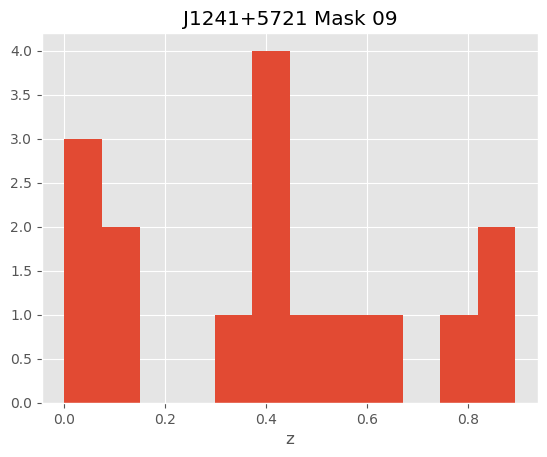

In [7]:
plt.hist((improved_GuessAndCheck(fields[-1]))['z'],bins=12,stacked='true')
plt.xlabel('z')
plt.title('J1241+5721 Mask 09');

In [8]:
np.median(improved_GuessAndCheck(fields[-1])['z'])

0.407251007254117

In [9]:
# List of dataframes!

dtf_list = [improved_GuessAndCheck(fields[ii]) for ii in range(len(fields))]

## I'll plot a couple more just for the hell of it:

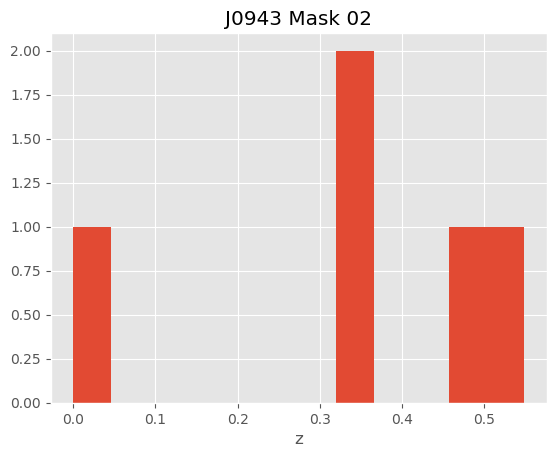

In [10]:
plt.hist((dtf_list[17])['z'],bins=12,stacked='true')
plt.xlabel('z')
plt.title('{0:s} Mask {1:s}'.format(dtf_list[17].index[0][0:5], fields[17][-18:-16]));

In [11]:
def plottingMachine(mask_index,bin_no):
    plt.hist((dtf_list[mask_index])['z'],bins=bin_no,stacked='true')
    plt.xlabel('z')
    plt.title('{0:s} Mask {1:s}'.format(fields[mask_index][15:20], fields[mask_index][-18:-16]));

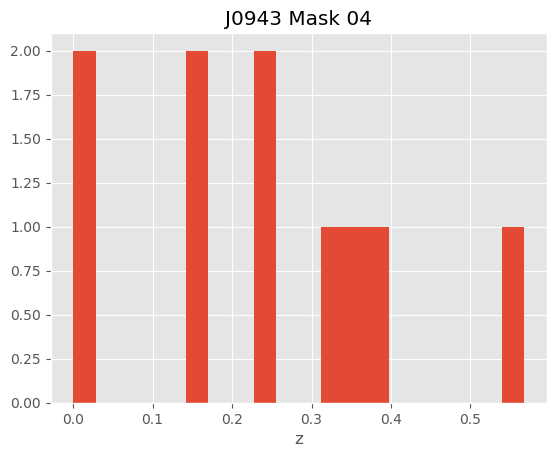

In [12]:
plottingMachine(19,20)

## Might as well just plot them all:

In [13]:
allz = [dtf_list[ii]['z'] for ii in range(len(dtf_list))]

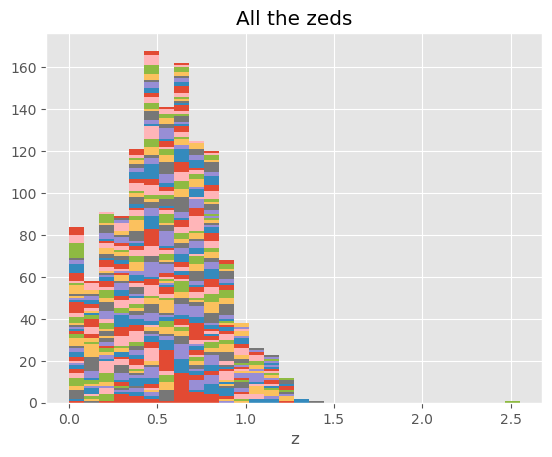

In [14]:
plt.hist(allz,bins=30,stacked='true')
plt.xlabel('z')
plt.title('All the zeds');
#plt.savefig('./../../../Documents/z_hist_for_all.png');

Way to mess up the scale, quasar. Actually as this is supposed to be comparing galaxies it occurs to me that maybe I should filter out all the stars and QSOs. It would fix that problem as well as the pile-up of stars at $z=0$.

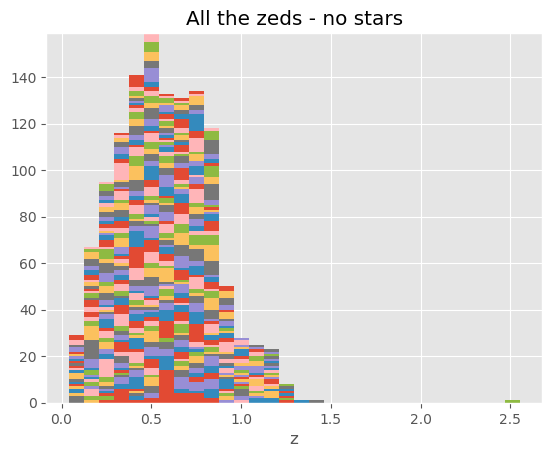

In [15]:
dtf_list_sans_stars = [improved_GuessAndCheck(fields[ii], stars_filter=True) for ii in range(len(fields))]
allz_unless_that_z_is_0 = [dtf_list_sans_stars[ii]['z'] for ii in range(len(dtf_list_sans_stars))]
plt.hist(allz_unless_that_z_is_0,bins=30,stacked='true')
plt.xlabel('z')
plt.title('All the zeds - no stars');
#plt.savefig('./../../../Documents/z_hist_for_all_no_stars.png');

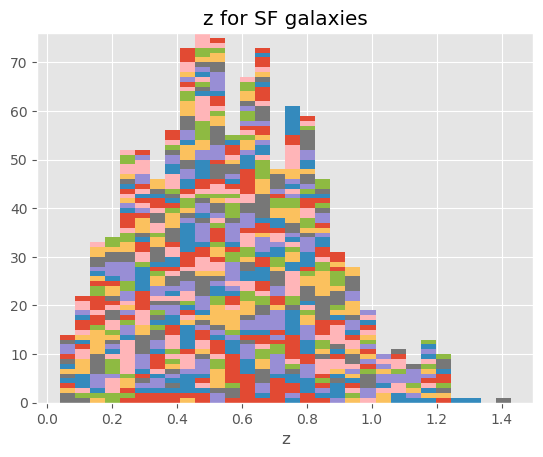

In [16]:
dtf_list_SF = [improved_GuessAndCheck(fields[ii], star_forming=True) for ii in range(len(fields))]
SF_z = [dtf_list_SF[ii]['z'] for ii in range(len(dtf_list_SF))]
plt.hist(SF_z,bins=30,stacked='true')
plt.xlabel('z')
plt.title('z for SF galaxies');
#plt.savefig('./../../../Documents/SF_z.png');

Oh I just realized this catches Quasars too so that's good.

## SF versus unabridged galaxy list:

In [33]:
gal_list = []
for ii in range(len(SF_z)):
    for jj in range(len(SF_z[ii])):
        gal_list.append(SF_z[ii][jj])
        
full_gal_list = []
for ii in range(len(allz_unless_that_z_is_0)):
    for jj in range(len(allz_unless_that_z_is_0[ii])):
        full_gal_list.append(allz_unless_that_z_is_0[ii][jj])

In [34]:
print('Total: {0:.2f} \n Star-Forming: {1:.2f}'.format(len(full_gal_list),len(gal_list)))

Total: 1260.00 
 Star-Forming: 1075.00


# Looking around z=0.16

Which requires some vectorized expressions so things don't take too long.

In [29]:
gal_array = np.array(gal_list).reshape(len(gal_list),)

In [30]:
rel_ind = np.ravel(np.where((gal_array > 0.14) & (gal_array < 0.19)))

In [20]:
party_at_point_16 = gal_array[rel_ind]

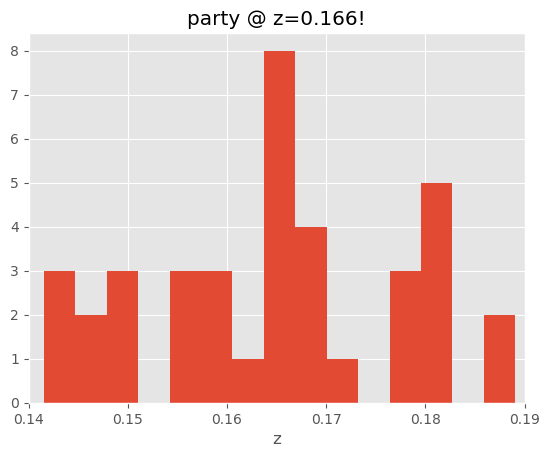

In [21]:
plt.hist(party_at_point_16,bins=15,stacked='true')
plt.xlabel('z')
plt.xlim(0.14,0.19)
plt.title('party @ z=0.166!')
plt.savefig('./py_files/z0.166party.png');

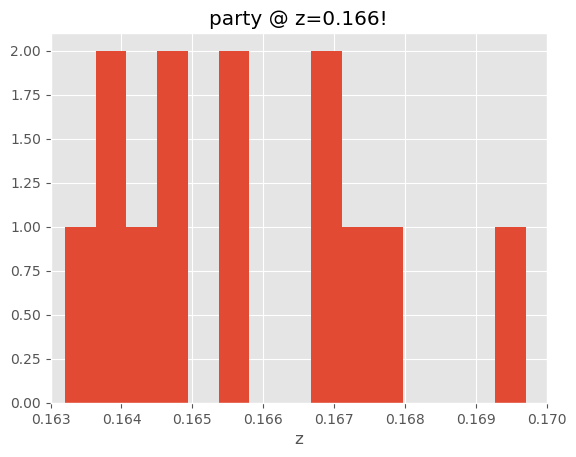

In [22]:
# slightly closer in on the z of interest:

rel_ind = np.ravel(np.where((gal_array > 0.163) & (gal_array < 0.17)))
party_at_point_16 = gal_array[rel_ind]
plt.hist(party_at_point_16,bins=15,stacked='true')
plt.xlabel('z')
plt.xlim(0.163,0.17)
plt.title('party @ z=0.166!');

In [23]:
party_at_point_16

array([0.1675822 , 0.1655488 , 0.1641791 , 0.1646    , 0.1638482 ,
       0.1648004 , 0.1632    , 0.16681   , 0.16710304, 0.1697113 ,
       0.1654337 , 0.1674655 , 0.1639337 ])

# Further party investigation, at z=0.24-ish?

In [24]:
p2_ll, p2_hl = [0.22, 0.24]

party2_ind = np.ravel(np.where((gal_array > p2_ll) & (gal_array < p2_hl)))
party_at_point_24 = gal_array[party2_ind]

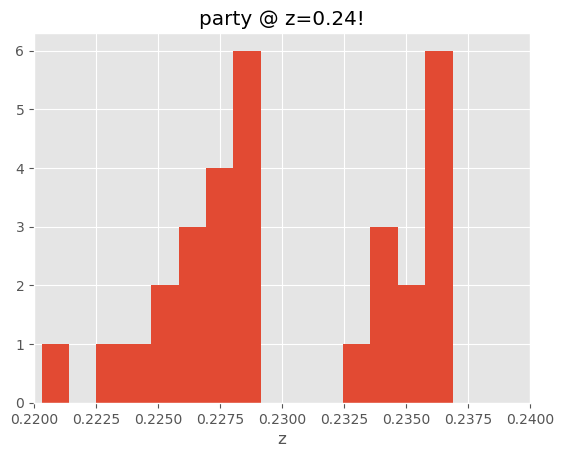

In [25]:
plt.hist(party_at_point_24,bins=15,stacked='true')
plt.xlabel('z')
plt.xlim(p2_ll, p2_hl)
plt.title('party @ z=0.24!');
#plt.savefig('./py_files/z0.24party.png');

## Or was it 0.25?

In [26]:
p2_ll, p2_hl = [0.23, 0.27]

party2_ind = np.ravel(np.where((gal_array > p2_ll) & (gal_array < p2_hl)))
party_at_point_25 = gal_array[party2_ind]

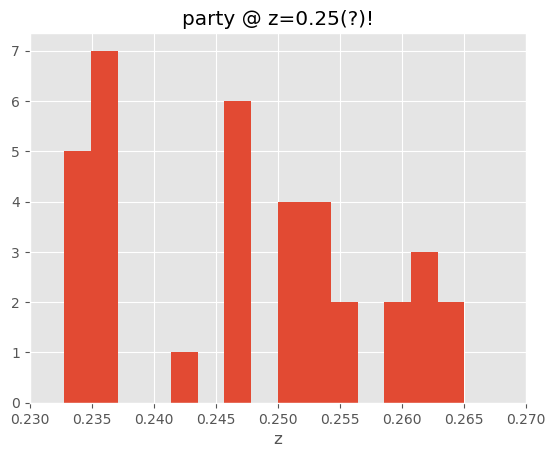

In [27]:
plt.hist(party_at_point_25,bins=15,stacked='true')
plt.xlabel('z')
plt.xlim(p2_ll, p2_hl)
plt.title('party @ z=0.25(?)!');
#plt.savefig('./py_files/z0.25party.png');